In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
original_data = pd.read_csv("C:/Users/thddu/Desktop/데이터분석/진도대교분석/AI_anomalyDetection/csv_collection/data.csv", index_col=False)
original_data.head()

,Unnamed: 0,X,ind,X.Time,ACC001_X,ACC001_Y,ACC001_Z,ACC002_Z,ACC003_Z,CAC001,...,WGT002_S,WGT002_V,WVR001_HDR,WVR001_HSP,WVR001_PDR,WVR001_PSP,WVR002_HDR,WVR002_HSP,WVR002_PDR,WVR002_PSP
0,1,2029,2029,2018-01-02 09:38:00.0000,40.805119,25.504034,0.416799,974.861377,1003.282507,712.910132,...,1.813764,0.289230,7.401429,0.424711,116.731682,3.260048,89.110220,60.459179,272.565559,0.995250
1,7,2069,2069,2018-01-02 10:18:00.0000,40.827409,25.699538,0.758546,974.872434,1003.569013,712.738905,...,1.606156,0.312017,14.887839,0.439992,147.398011,1.670779,89.241007,60.369046,261.912444,0.857520
2,8,2091,2091,2018-01-02 10:40:00.0000,40.807949,25.851085,0.664547,974.777937,1003.794401,712.730147,...,0.955877,0.169726,9.712352,0.134816,198.366212,0.827321,89.370690,60.502694,280.931183,0.696128
3,15,2146,2146,2018-01-02 11:35:00.0000,40.980717,26.277307,1.573698,974.768914,1004.406324,712.621695,...,2.585505,0.166486,16.055534,0.734244,296.837162,2.585418,88.674855,60.469280,93.611917,1.421831
4,16,2151,2151,2018-01-02 11:40:00.0000,40.993807,26.313338,1.639161,974.710911,1004.481729,712.663076,...,1.925782,0.316285,10.667167,0.430964,280.470441,2.179158,88.331297,60.458463,98.351081,1.768940


In [12]:
original_data.drop(columns= ['Unnamed: 0', 'X', 'ind'], inplace=True)

In [14]:
original_data['X.Time'] = pd.to_datetime(original_data['X.Time'])

In [15]:
original_data['X.Time'].dtype

dtype('<M8[ns]')

In [16]:
original_data = original_data.rename(columns={'X.Time' : 'datetime'})
original_data.head()

,datetime,ACC001_X,ACC001_Y,ACC001_Z,ACC002_Z,ACC003_Z,CAC001,CAC002,CAC003,CAC004,...,WGT002_S,WGT002_V,WVR001_HDR,WVR001_HSP,WVR001_PDR,WVR001_PSP,WVR002_HDR,WVR002_HSP,WVR002_PDR,WVR002_PSP
0,2018-01-02 09:38:00,40.805119,25.504034,0.416799,974.861377,1003.282507,712.910132,707.205802,347.641772,378.303599,...,1.813764,0.289230,7.401429,0.424711,116.731682,3.260048,89.110220,60.459179,272.565559,0.995250
1,2018-01-02 10:18:00,40.827409,25.699538,0.758546,974.872434,1003.569013,712.738905,706.851693,347.931524,378.772523,...,1.606156,0.312017,14.887839,0.439992,147.398011,1.670779,89.241007,60.369046,261.912444,0.857520
2,2018-01-02 10:40:00,40.807949,25.851085,0.664547,974.777937,1003.794401,712.730147,706.634184,348.467358,379.236346,...,0.955877,0.169726,9.712352,0.134816,198.366212,0.827321,89.370690,60.502694,280.931183,0.696128
3,2018-01-02 11:35:00,40.980717,26.277307,1.573698,974.768914,1004.406324,712.621695,706.231516,349.356274,380.201538,...,2.585505,0.166486,16.055534,0.734244,296.837162,2.585418,88.674855,60.469280,93.611917,1.421831
4,2018-01-02 11:40:00,40.993807,26.313338,1.639161,974.710911,1004.481729,712.663076,706.231409,349.273731,380.100479,...,1.925782,0.316285,10.667167,0.430964,280.470441,2.179158,88.331297,60.458463,98.351081,1.768940


## CAC, FBG에 대해 먼저 보기

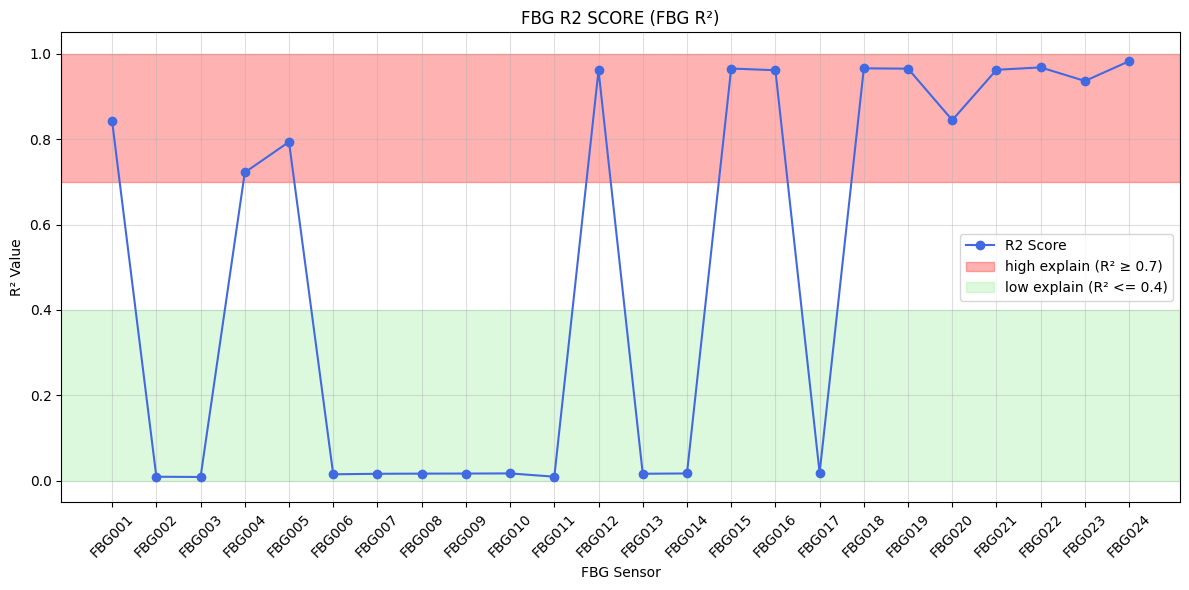

In [35]:
# CAC, FBG에 대한 선형회귀 모델 그려볼 것

# FBG의 r2로 교량에 대한 이해
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

fbg_cols = [c for c in original_data.columns if c.startswith("FBG")]
input_cols = [c for c in original_data.columns if not c.startswith(('FBG', 'CAC','DIS', 'datetime'))]

r2_scores = {}

for col in fbg_cols : 
    X = original_data[input_cols]
    y = original_data[col]

    model = LinearRegression()
    model.fit(X,y)

    y_pred = model.predict(X)
    r2_scores[col] = r2_score(y,y_pred)

r2_df = pd.DataFrame(list(r2_scores.items()), columns=["Sensor", "R2_Score"])

plt.figure(figsize=(12,6))
plt.plot(r2_df['Sensor'], r2_df['R2_Score'], marker = 'o', color = 'royalblue', label = 'R2 Score')

plt.axhspan(0.7, 1.0, color="red", alpha=0.3, label="high explain (R² ≥ 0.7)")
plt.axhspan(0.0, 0.4, color="lightgreen", alpha=0.3, label="low explain (R² <= 0.4)")

plt.title("FBG R2 SCORE (FBG R²)")
plt.xlabel("FBG Sensor")
plt.ylabel("R² Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


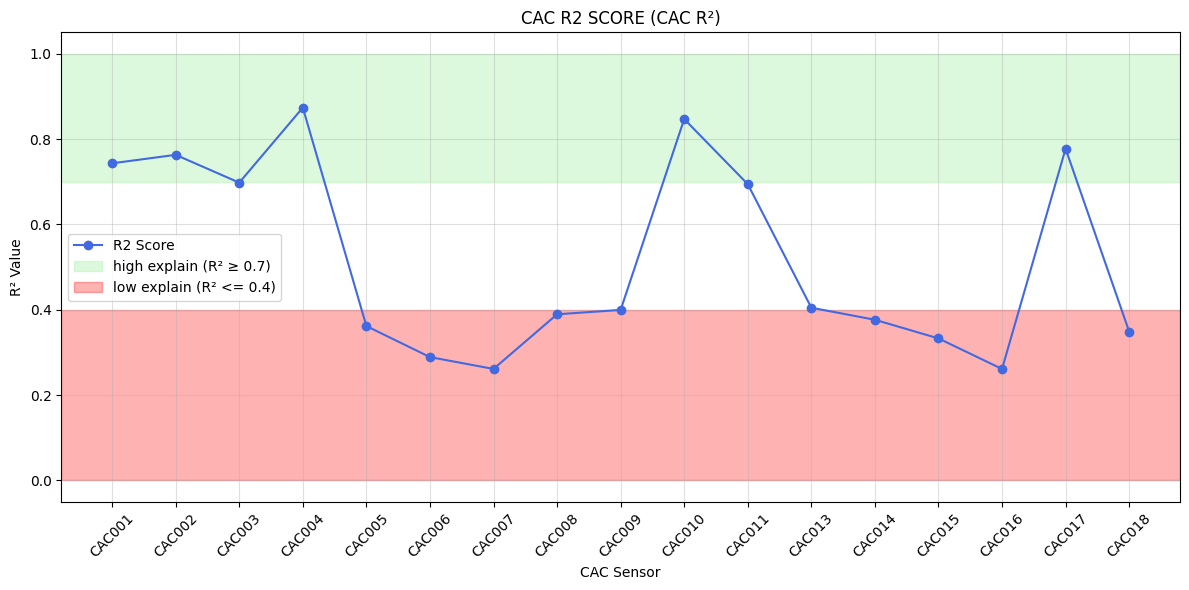

In [36]:
# CAC, FBG에 대한 선형회귀 모델 그려볼 것

# CAC r2로 교량에 대한 이해
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

cac_cols = [c for c in original_data.columns if c.startswith("CAC")]
input_cols = [c for c in original_data.columns if not c.startswith(('FBG', 'CAC','DIS', 'datetime'))]

r2_scores = {}

for col in cac_cols : 
    X = original_data[input_cols]
    y = original_data[col]

    model = LinearRegression()
    model.fit(X,y)

    y_pred = model.predict(X)
    r2_scores[col] = r2_score(y,y_pred)

r2_df = pd.DataFrame(list(r2_scores.items()), columns=["Sensor", "R2_Score"])

plt.figure(figsize=(12,6))
plt.plot(r2_df['Sensor'], r2_df['R2_Score'], marker = 'o', color = 'royalblue', label = 'R2 Score')

plt.axhspan(0.7, 1.0, color="lightgreen", alpha=0.3, label="high explain (R² ≥ 0.7)")
plt.axhspan(0.0, 0.4, color="red", alpha=0.3, label="low explain (R² <= 0.4)")

plt.title("CAC R2 SCORE (CAC R²)")
plt.xlabel("CAC Sensor")
plt.ylabel("R² Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


## 덴드로그램으로 변수들간 관계 보기

C:\Users\thddu\AppData\Local\Temp\ipykernel_19556\2523859347.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist, method = 'ward')


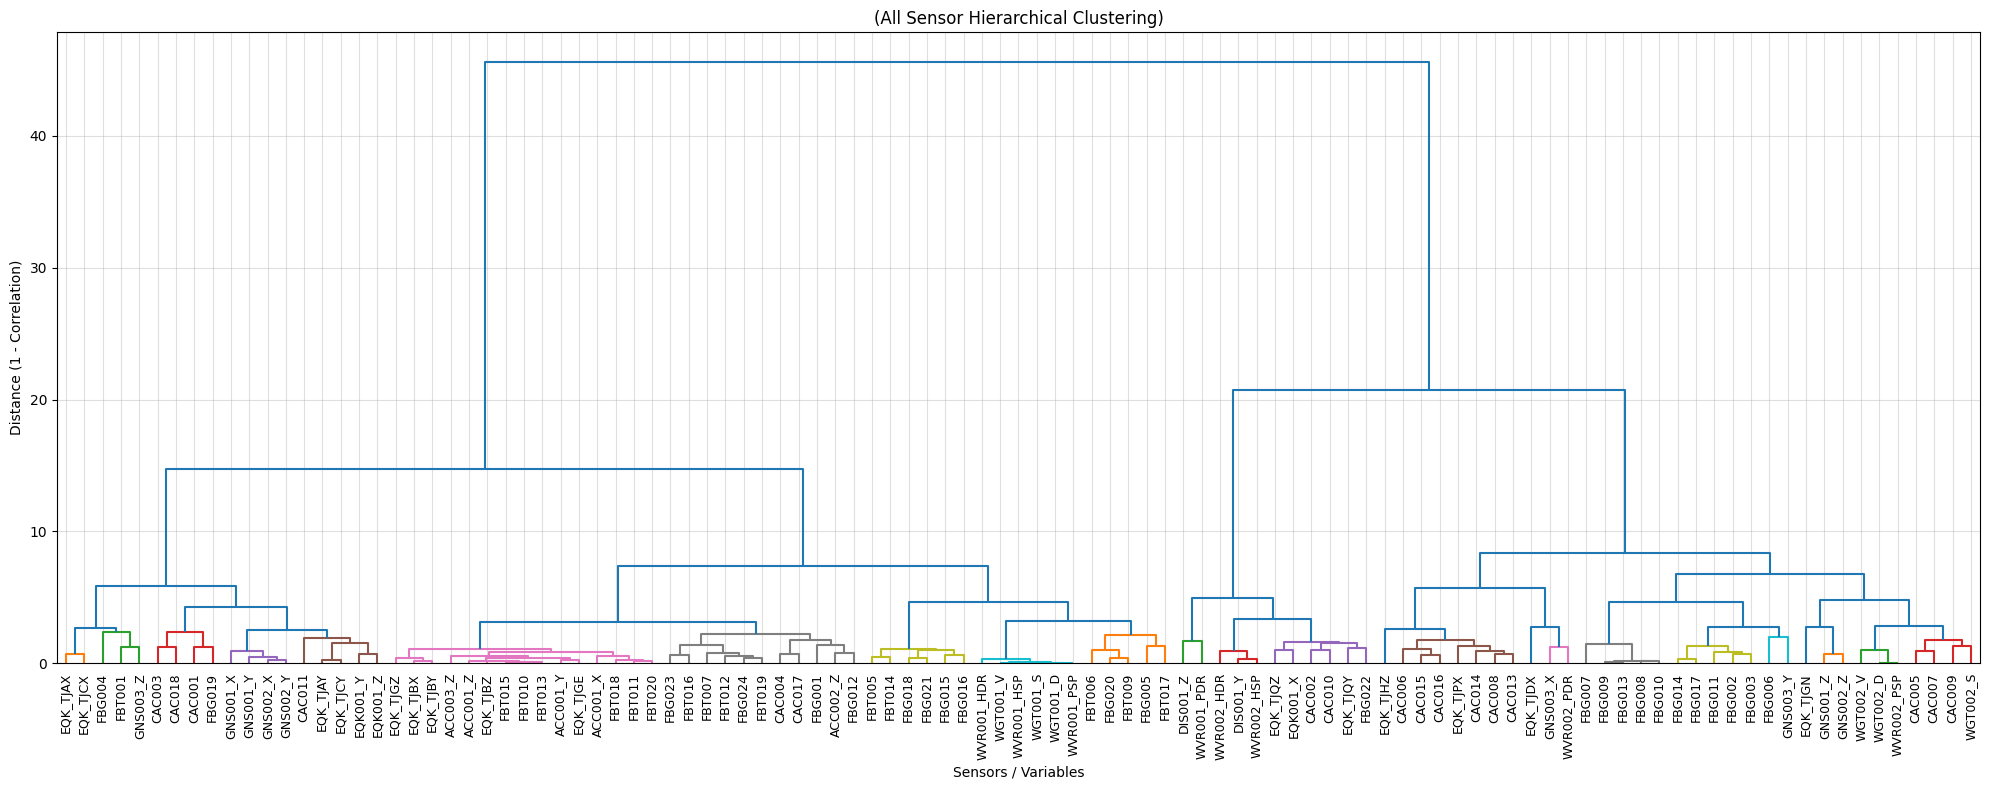

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram

data_set = original_data.drop(columns='datetime')

corr = data_set.corr(method='pearson')
dist = 1 - corr

Z = linkage(dist, method = 'ward')

plt.figure(figsize=(20,8))
dendrogram(
    Z,
    labels=data_set.columns,
    leaf_rotation=90,
    leaf_font_size=9,
    color_threshold=2.5   # 군집 구분 높이 조절
)

plt.title("(All Sensor Hierarchical Clustering)")
plt.xlabel("Sensors / Variables")
plt.ylabel("Distance (1 - Correlation)")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


## 높은 설명도를 보여주는 FBG : 1 4 5 12 15 16 18 19 20 21 22 23 24
## 높은 설명도를 보여주는 CAC : 1 2 3 4 10 11 17

- X로 Y를 설명할 수 있는 변수들이 존재, 그것들이 위 markdown 컬럼들
- 이 markdown컬럼들과 유독 연관관계가 있는 X값들을 덴드로그램으로 볼 수 있음
